In [2]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [3]:
data_path = '..\data\interim\dataset_2017_2018[Preprocess].csv'
df_data = pd.read_csv(data_path)
df_data['ts'] = pd.to_datetime(df_data['ts'])
df_data = df_data.set_index('ts')
df_data.sample(5)

,Temperatura,Umidade
ts,,
2017-12-03 00:00:00,20.445714,76.128571
2018-12-14 13:00:00,30.772857,46.998571
2017-11-03 12:00:00,27.692857,44.067143
2017-05-02 19:00:00,21.634000,94.420000
2018-11-05 08:00:00,19.468333,78.050000


In [4]:
def get_humidex(T,H):
    z = 6.112*(10**((7.5*T)/(237.7+T)))*(H/100)
    return T+((5/9)*(z-10))

df_data['Humidex'] = get_humidex(df_data['Temperatura'].values,df_data['Umidade'].values)
df_data

,Temperatura,Umidade,Humidex
ts,,,
2017-01-01 00:00:00,19.509286,85.564286,24.720297
2017-01-01 01:00:00,19.685000,84.550000,24.884933
2017-01-01 02:00:00,19.283333,87.566667,24.592768
2017-01-01 03:00:00,19.080714,89.007143,24.430554
2017-01-01 04:00:00,19.039286,88.814286,24.337462
...,...,...,...
2018-12-31 19:00:00,27.980000,62.733333,35.554579
2018-12-31 20:00:00,25.134286,71.327143,32.207899
2018-12-31 21:00:00,23.837143,75.842857,30.709383


<IPython.core.display.Javascript object>


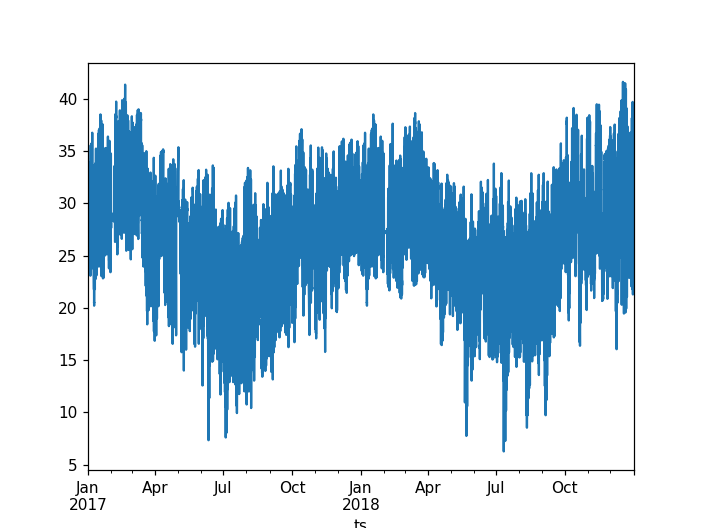

In [5]:
df_data['Humidex'].plot()

In [6]:
nivel = []
humidex_values = df_data['Humidex'].values
for h in humidex_values:
    if h<=29: 
        nivel.append('comfortable')
    elif h<=39: 
        nivel.append('some discomfort')
    elif h<=45: 
        nivel.append('great discomfort')
    else: 
        nivel.append('dangerous')
df_data['Nivel'] = nivel

In [7]:
(df_data['Nivel']=='great discomfort').sum()

47

In [8]:
df_data

,Temperatura,Umidade,Humidex,Nivel
ts,,,,
2017-01-01 00:00:00,19.509286,85.564286,24.720297,comfortable
2017-01-01 01:00:00,19.685000,84.550000,24.884933,comfortable
2017-01-01 02:00:00,19.283333,87.566667,24.592768,comfortable
2017-01-01 03:00:00,19.080714,89.007143,24.430554,comfortable
2017-01-01 04:00:00,19.039286,88.814286,24.337462,comfortable
...,...,...,...,...
2018-12-31 19:00:00,27.980000,62.733333,35.554579,some discomfort
2018-12-31 20:00:00,25.134286,71.327143,32.207899,some discomfort
2018-12-31 21:00:00,23.837143,75.842857,30.709383,some discomfort


In [9]:
df_H = df_data[['Humidex']].copy()
df_H['interval'] = df_H.index.time
df_H.index = df_H.index.date
df_pivot_H = df_H.pivot(columns='interval')
df_pivot_H = df_pivot_H.dropna()

In [19]:
df_pivot_H['Humidex'].to_csv('..\data\processed\\time_series_2017_2018[Transformation].csv',index_label='ts')